In [92]:
from matplotlib import pyplot as plt
import matplotlib.animation
from IPython.display import HTML
import numpy as np


In [125]:

class Conway_Board(object):
    def __init__(self, w, h, category="random", subcategory=None):
        self._category=category
        self._subcategory=subcategory
        self._width = w
        self._height = h
        if category == "random":
            self._board = self.random_board()
        elif category == "oscillator":
            self._board = self.oscillator(subcategory)
        elif category == "spaceship":
            self._board = self.spaceship(subcategory)
        
    def random_board(self):

        return np.random.choice([0,1], 
                            self._width * self._height
                           ).reshape((self._height, self._width))

    def oscillator(self, subcategory):
        board = np.zeros(self._width * self._height).reshape((self._height, self._width))
        x,y = np.array(board.shape)//2
        if subcategory=="blinker":
            board[x-1:x+2, y] +=1
        elif subcategory=="toad":
            board[x-1:x+2, y] +=1
            board[x:x+3, y+1] +=1
            
            
        return board
    
    
    def spaceship(self, subcategory):
        board = np.zeros(self._width * self._height).reshape((self._height, self._width))
        x,y = np.array(board.shape)//2
        if subcategory=="glider":
            board[[x-1, x+1], [y-1, y-1]] +=1
            board[[x, x+1], y] +=1
            board[[x], y+1] +=1
        elif subcategory=="lightweight":
            #import pdb;pdb.set_trace()
            board[y-1, [x-2,x+1]] +=1
            board[y, x+2] +=1
            board[y+1, [x-2, x+2]] +=1
            board[y+2,x-1:x+3] +=1
            

            
            
        return board
    
    def cell_lifecycle(self, cell_coords, neighborhood):
        alive = neighborhood[cell_coords] # 1, 0 :: alive, dead
        
        neighbors = np.sum(neighborhood) - alive

        if alive  and neighbors < 2:    #underpopulation
            return 0
        elif alive  and  neighbors in (2 ,3): #next generation
            return 1
        elif alive and neighbors > 3: #over population
            return 0
        elif not alive and neighbors == 3: #reproduction
            return 1
        else:
            return 0  

    def evolve_board(self):
        
        future_board = self._board.copy()
        for row_ix, row in enumerate(self._board):
            for col_ix, cell in enumerate(row):
                left_col = max(0, col_ix - 1)
                right_col = min(col_ix + 2, self._width)
                top_row = max(0, row_ix - 1)
                bottom_row = min(row_ix + 2, self._height)
                neighborhood = self._board[top_row:bottom_row, left_col:right_col]
                cell_col_loc = 1 if col_ix > 0 else 0
                cell_row_loc = 1 if row_ix > 0 else 0
                cell_loc = cell_row_loc, cell_col_loc
                future_cell = self.cell_lifecycle(cell_loc, neighborhood)
                future_board[row_ix, col_ix] = future_cell
        self._board=future_board
        return future_board

    def animate(self):
        fig, ax = plt.subplots()
        grid_plot = ax.imshow(self._board)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"{self._category}: {self._subcategory}")
        def animate(i):
            grid_plot.set_data(self.evolve_board())

        ani = matplotlib.animation.FuncAnimation(fig, animate, frames=40)
        return HTML(ani.to_jshtml())

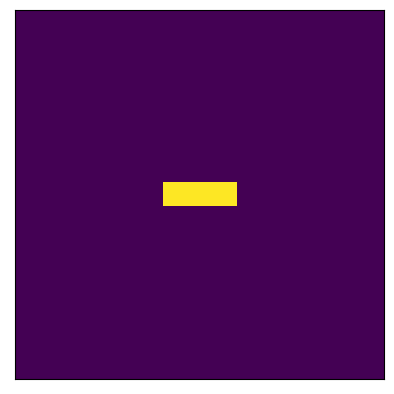

In [107]:
board = Conway_Board(10,10, "oscillator", "blinker")
board.animate()

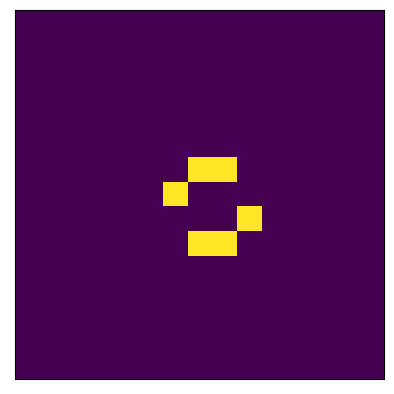

In [100]:
board = Conway_Board(15,15, "oscillator", "toad")
board.animate()

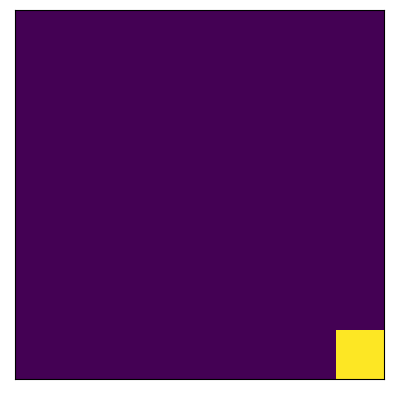

In [101]:
board = Conway_Board(15,15, "spaceship", "glider")
board.animate()

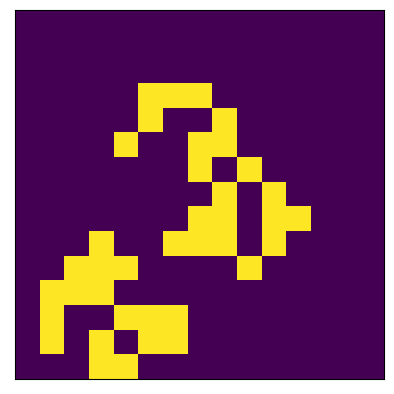

In [102]:
board = Conway_Board(15,15, "spaceship", "lightweight")
board.animate()

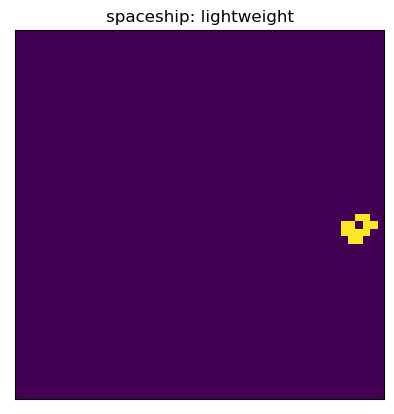

In [126]:
board = Conway_Board(50,50, "spaceship", "lightweight")
board.animate()